# Q2 Clustering Iris Dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./iris.csv')    # Reading Dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Dropping unnecessary columns
df.drop('Id',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)    

## Finding Optimum Number of Clusters by 2 Methods:

### 1) Silhoutte Method

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

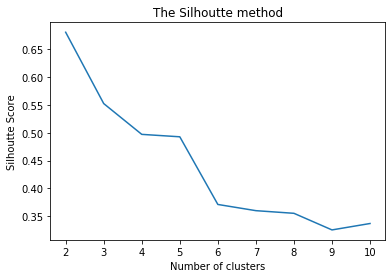

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), sil)
plt.title('The Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

#### Maximum Silhoutte Score is achieved at k=2. Thus, we will plot clusters with k=2.

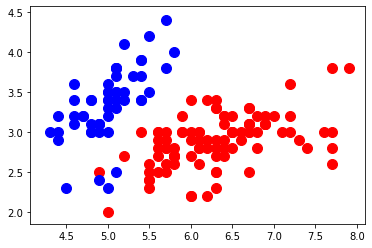

In [23]:
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue')
plt.show()

### 2) Elbow Method

In [26]:
from sklearn.cluster import KMeans
wcss = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

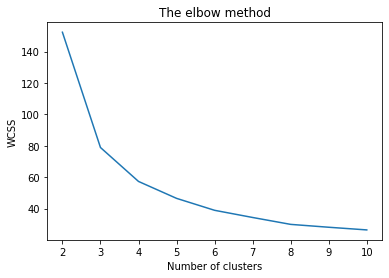

In [28]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The elbow forms at k=3. Thus, we will take k=3.

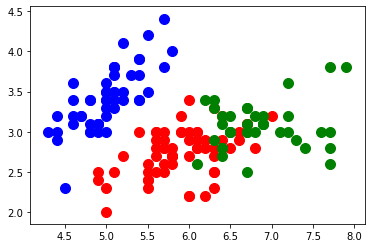

In [27]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green')
plt.show()

## Result:

### Clusters are more distinct when k=2.